In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns

In [27]:
df = pd.read_csv('nyc_bird_data_Mar_2020.txt', sep="\t")

/Users/melissamunz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9,10,21,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df['COUNTY'].unique()

array(['New York'], dtype=object)

# **Initial Data Exploration:**

In [29]:
df.head()

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 46
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,2019-07-19 10:29:34,33194,species,Northern Cardinal,Cardinalis cardinalis,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,2019-07-19 10:15:03,5892,species,Least Sandpiper,Calidris minutilla,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,2019-07-19 10:29:37,23153,species,Barn Swallow,Hirundo rustica,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,2019-07-19 10:29:35,26287,species,Carolina Wren,Thryothorus ludovicianus,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,2019-07-19 10:29:36,32501,species,Red-winged Blackbird,Agelaius phoeniceus,NaN,NaN,X,NaN,...,NaN,0,NaN,0,1,0,NaN,NaN,NaN,NaN


In [30]:
df['BREEDING BIRD ATLAS CATEGORY'].value_counts()

C2    8599
C4    6895
C3    4596
C1    3975
Name: BREEDING BIRD ATLAS CATEGORY, dtype: int64

In [31]:
df.shape

(1699064, 47)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699064 entries, 0 to 1699063
Data columns (total 47 columns):
GLOBAL UNIQUE IDENTIFIER        object
LAST EDITED DATE                object
TAXONOMIC ORDER                 int64
CATEGORY                        object
COMMON NAME                     object
SCIENTIFIC NAME                 object
SUBSPECIES COMMON NAME          object
SUBSPECIES SCIENTIFIC NAME      object
OBSERVATION COUNT               object
BREEDING BIRD ATLAS CODE        object
BREEDING BIRD ATLAS CATEGORY    object
AGE/SEX                         object
COUNTRY                         object
COUNTRY CODE                    object
STATE                           object
STATE CODE                      object
COUNTY                          object
COUNTY CODE                     object
IBA CODE                        object
BCR CODE                        float64
USFWS CODE                      float64
ATLAS BLOCK                     object
LOCALITY                    

In [33]:
# Any columns with over 1.6M missing values will be removed because it will be meaningless within the context of this large dataset.
print(df.isna().sum())

GLOBAL UNIQUE IDENTIFIER              0
LAST EDITED DATE                      0
TAXONOMIC ORDER                       0
CATEGORY                              0
COMMON NAME                           0
SCIENTIFIC NAME                       0
SUBSPECIES COMMON NAME          1607383
SUBSPECIES SCIENTIFIC NAME      1607383
OBSERVATION COUNT                     0
BREEDING BIRD ATLAS CODE        1674999
BREEDING BIRD ATLAS CATEGORY    1674999
AGE/SEX                         1646617
COUNTRY                               0
COUNTRY CODE                          0
STATE                                 0
STATE CODE                            0
COUNTY                                0
COUNTY CODE                           0
IBA CODE                         444673
BCR CODE                          96717
USFWS CODE                      1699064
ATLAS BLOCK                     1695513
LOCALITY                              0
LOCALITY ID                           0
LOCALITY TYPE                         0


In [34]:
#This function will allow us to plot different columns and subsets of columns as needed for EDA:

def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    
    #set up the seaborn style. 
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    
    #math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    #math.ceil() : Python number method ceil() returns ceiling value of x - the smallest integer not less than x.
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    #Determine vizualization type based on the data types!
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
# plot_distribution(observation_count, cols=1, width=20, height=20, hspace=0.45, wspace=0.5)

# Convert to Datetime:


In [35]:
# Check the current formatting
df['OBSERVATION DATE'].sample()

1082439    2017-12-31
Name: OBSERVATION DATE, dtype: object

In [36]:
# convert column to datetime
df['OBSERVATION_DATE'] = pd.to_datetime(df['OBSERVATION DATE'])

In [37]:
# create month and year columns
df['MONTH'] = pd.DatetimeIndex(df['OBSERVATION_DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['OBSERVATION_DATE']).year

# Fill NAN's

After removing all values 1.6M + missing, remaining columns are 

In [46]:
df['OBSERVATION COUNT'].sample()

1362619    10
Name: OBSERVATION COUNT, dtype: object

In [49]:
observation_count = df[['OBSERVATION COUNT']]

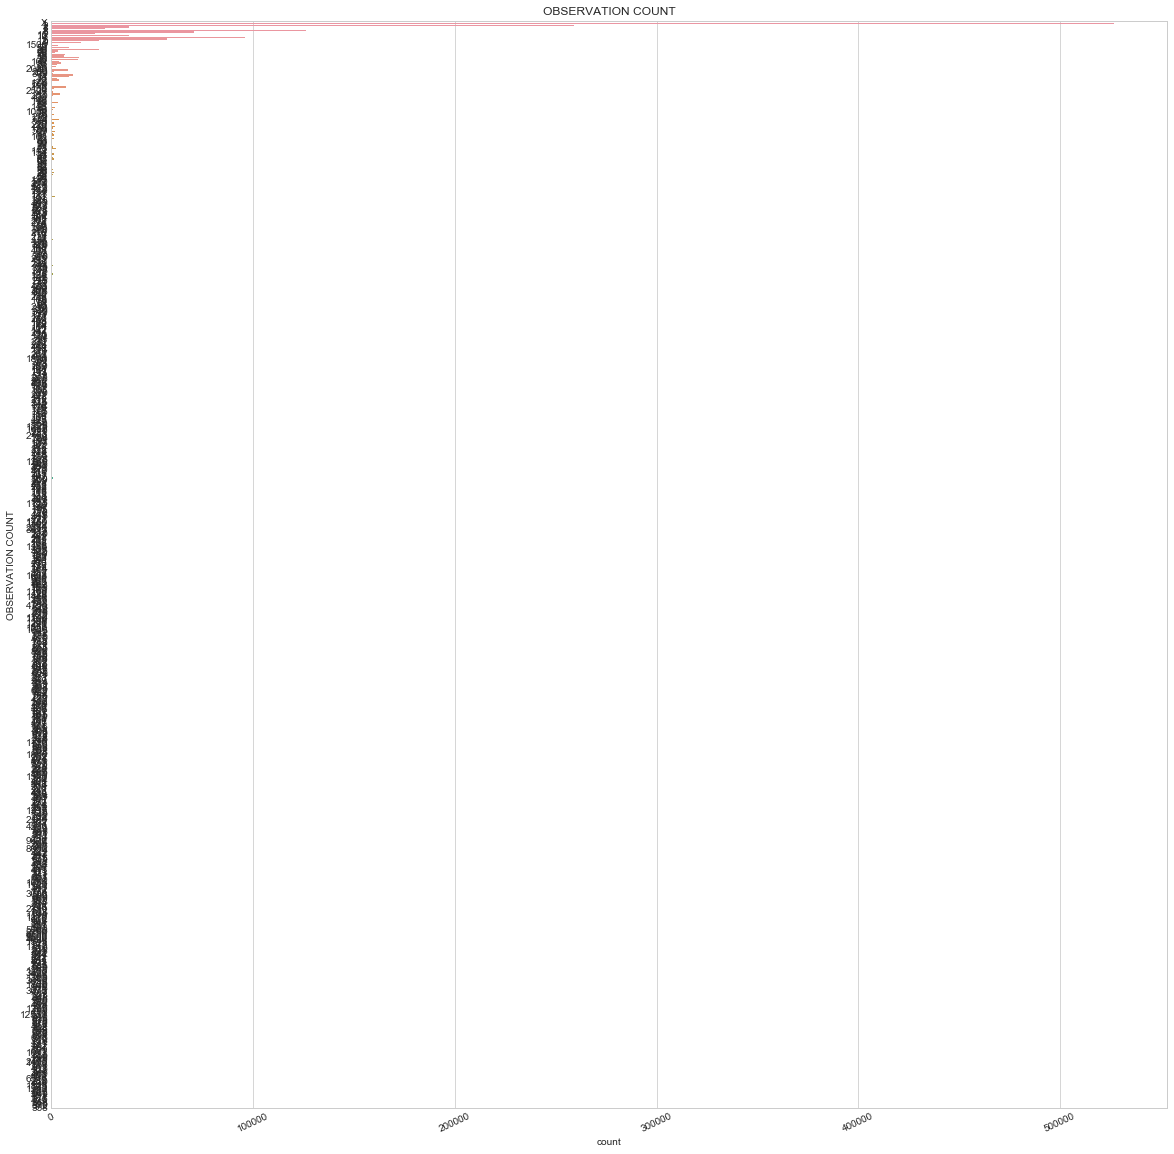

In [40]:
plot_distribution(observation_count, cols=1, width=20, height=20, hspace=0.45, wspace=0.5)

In [50]:
#We will fill all the 'X' values with 1, assuming that each sighting contained AT LEAST one bird
df['OBSERVATION_COUNT'] = df['OBSERVATION COUNT'].replace('X', '1')


In [52]:
#convert OBSERVATION COUNT into a numerica value (currently an object, above)
df['OBSERVATION_COUNT'] = pd.to_numeric(df['OBSERVATION_COUNT'])

# **Exploring Individual Features:**

**CATEGORY:** The category (e.g., species, hybrid, slash) assigned to this taxon in the eBird/Clements taxonomy.

- Species: e.g., Tundra Swan

- Hybrid: Hybrid between two species, e.g., Tundra x Trumpeter Swan (hybrid)

- Intergrade: Hybrid between two subspecies or subspecies groups, e.g., Tundra Swan (Whistling x Bewick’s) 

- Spuh:  Genus or identification at broad level, e.g., swan sp.

- Slash: Identification to Species-pair, e.g., Tundra/Trumpeter Swan

- Domestic: Distinctly-plumaged domesticated varieties that may be free-flying (these do not count on personal lists) e.g., Mallard (Domestic type)

- Form: Miscellaneous other taxa, including recently-described species yet to be accepted or distinctive forms that are not universally accepted, e.g., Red-tailed Hawk (abieticola), Upland Goose (Bar-breasted)

In [171]:
#Review all individual categories

print(df['CATEGORY'].unique())

['species' 'form' 'domestic' 'slash' 'spuh' 'issf' 'hybrid']


In [172]:
category_groups = df.groupby(df['CATEGORY']).count()

In [173]:
category_groups

,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,BREEDING BIRD ATLAS CATEGORY,...,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 46,OBSERVATION_DATE,MONTH,YEAR,OBSERVATION_COUNT
CATEGORY,,,,,,,,,,,,,,,,,,,,,
domestic,59483,59483,59483,59483,59483,59053,59053,59483,460,460,...,59483,59483,0,23409,4908,0,59483,59483,59483,59483
form,2838,2838,2838,2838,2838,2838,2838,2838,4,4,...,2838,2838,0,1346,562,0,2838,2838,2838,2838
hybrid,1276,1276,1276,1276,1276,0,0,1276,4,4,...,1276,1276,0,641,195,0,1276,1276,1276,1276
issf,29790,29790,29790,29790,29790,29790,29790,29790,475,475,...,29790,29790,0,13367,3429,0,29790,29790,29790,29790
slash,1005,1005,1005,1005,1005,0,0,1005,6,6,...,1005,1005,0,390,456,0,1005,1005,1005,1005
species,1587872,1587872,1587872,1587872,1587872,0,0,1587872,22537,22537,...,1587872,1587872,74,636349,219655,0,1587872,1587872,1587872,1587872
spuh,16800,16800,16800,16800,16800,0,0,16800,579,579,...,16800,16800,0,7648,5730,0,16800,16800,16800,16800


**COMMON NAME**: 

In [174]:
#Review all species
total_species = len(df['COMMON NAME'].unique())
print(f'There are {total_species} total species')

There are 442 total species


In [175]:
df['COMMON NAME'].sample(30)

258737                      Mallard
1316669               Brown Creeper
1389628             Red-tailed Hawk
388362             Downy Woodpecker
1422757               Mourning Dove
62896       Black-and-white Warbler
774240          Blue-winged Warbler
1589702           Swainson's Thrush
677087                  Rock Pigeon
95199             Blackpoll Warbler
111651         Red-winged Blackbird
1180505                Canada Goose
64397             American Redstart
588479     Double-crested Cormorant
799610                     Ovenbird
721258                Cedar Waxwing
987434                Mourning Dove
397280                American Crow
724188                   Ruddy Duck
57342                 House Sparrow
604387                 Song Sparrow
1101448                Canada Goose
332570       White-throated Sparrow
1494061                     Mallard
1180146                Canada Goose
552677                Hermit Thrush
77112                   Rock Pigeon
1195865     Great Black-back

In [121]:
# Map sightings of a single species over time:

wt_sparrow = df[df['COMMON NAME'] == 'White-throated Sparrow']


2020

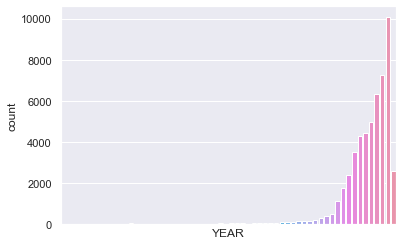

In [124]:
import seaborn as sns
import matplotlib.dates as mdates

sns.set(style="darkgrid")

ax = sns.countplot(x="YEAR", data=wt_sparrow)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# ax.set_xlim(1880, 2020)

# plt.xticks(np.arange(1880, 2020, step=10))


**OBSERVATION COUNT**:  The count of individuals made at the time of observation. If no count was made, an 'X' is used to indicate presence.


# Final Dataframe for Analysis:


The final dataframe will contain:

Original Columns:
- GLOBAL UNIQUE IDENTIFIER
- CATEGORY
- COMMON NAME

Created Columns:
- OBSERVATION_DATE
- MONTH

In [177]:
data = df[['GLOBAL UNIQUE IDENTIFIER', 'CATEGORY', 'COMMON NAME', 'OBSERVATION_COUNT', 'LATITUDE', 'LONGITUDE','OBSERVATION_DATE','MONTH', 'YEAR', 'OBSERVER ID', 'DURATION MINUTES', 'NUMBER OBSERVERS', 'TRIP COMMENTS', 'SPECIES COMMENTS','APPROVED']]

In [178]:
data.head()

,GLOBAL UNIQUE IDENTIFIER,CATEGORY,COMMON NAME,OBSERVATION_COUNT,LATITUDE,LONGITUDE,OBSERVATION_DATE,MONTH,YEAR,OBSERVER ID,DURATION MINUTES,NUMBER OBSERVERS,TRIP COMMENTS,SPECIES COMMENTS,APPROVED
0,URN:CornellLabOfOrnithology:EBIRD:OBS786503632,species,Northern Cardinal,1,40.741895,-73.989308,1880-10-23,10,1880,obsr1385587,NaN,NaN,NaN,NaN,1
1,URN:CornellLabOfOrnithology:EBIRD:OBS786499692,species,Least Sandpiper,1,40.741895,-73.989308,1881-05-14,5,1881,obsr1385587,NaN,NaN,NaN,NaN,1
2,URN:CornellLabOfOrnithology:EBIRD:OBS786503672,species,Barn Swallow,1,40.741895,-73.989308,1884-05-16,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
3,URN:CornellLabOfOrnithology:EBIRD:OBS786503655,species,Carolina Wren,1,40.741895,-73.989308,1884-05-13,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1
4,URN:CornellLabOfOrnithology:EBIRD:OBS786503665,species,Red-winged Blackbird,1,40.741895,-73.989308,1884-05-01,5,1884,obsr1385587,NaN,NaN,NaN,NaN,1


In [180]:
data.to_csv('nyc_birds.csv', index=False)